In [53]:
!pip install yfinance

In [43]:
import yfinance as yf

stock_name = "NVDA"
stock = yf.download(stock_name, start = "2024-01-01", end = "2025-01-01")

print(stock.head())
print(stock.columns)

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2024-01-02  48.154346  49.281026  47.581511  49.230042  411254000
2024-01-03  47.555515  48.170339  47.306585  47.471539  320896000
2024-01-04  47.984398  48.486255  47.494535  47.753461  306535000
2024-01-05  49.083080  49.532953  48.292304  48.448262  415039000
2024-01-08  52.238186  52.260183  49.464974  49.497966  642510000
MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])


In [44]:
print(stock.isnull().sum())
stock.bfill(inplace=True)

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64


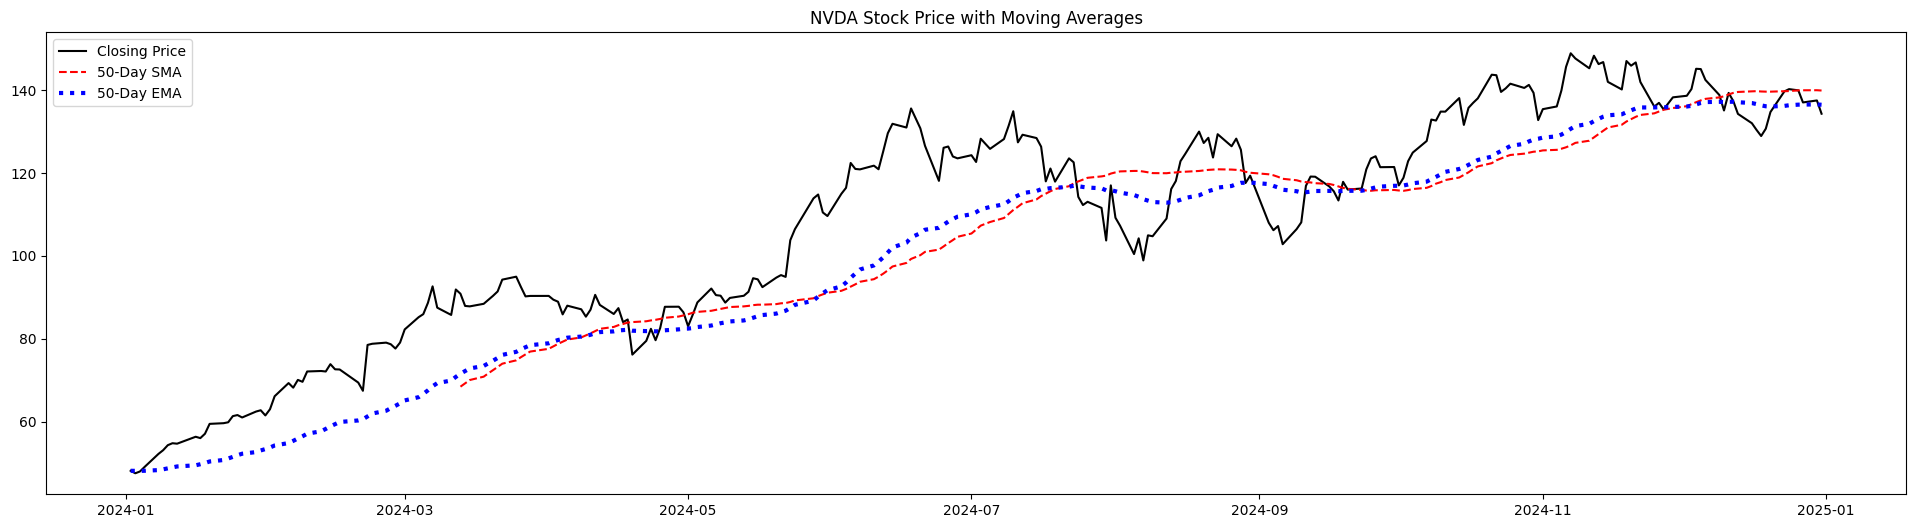

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

stock['SMA_50'] = stock['Close'].rolling(window=50).mean()
stock['EMA_50'] = stock['Close'].ewm(span=50, adjust=False).mean()

# Plot Closing Price & Moving Averages
plt.figure(figsize=(24,6))
plt.plot(stock['Close'], label='Closing Price', color='black')
plt.plot(stock['SMA_50'], label='50-Day SMA', linestyle='dashed', color='red')
plt.plot(stock['EMA_50'], label='50-Day EMA', linewidth = 3, linestyle='dotted', color='blue')
plt.title(f"{stock_name} Stock Price with Moving Averages")
plt.legend()
plt.show()

In [46]:
print(stock.columns)

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA'),
            ('SMA_50',     ''),
            ('EMA_50',     '')],
           names=['Price', 'Ticker'])


In [6]:
!pip install backtrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 19.4 MB/s eta 0:00:00


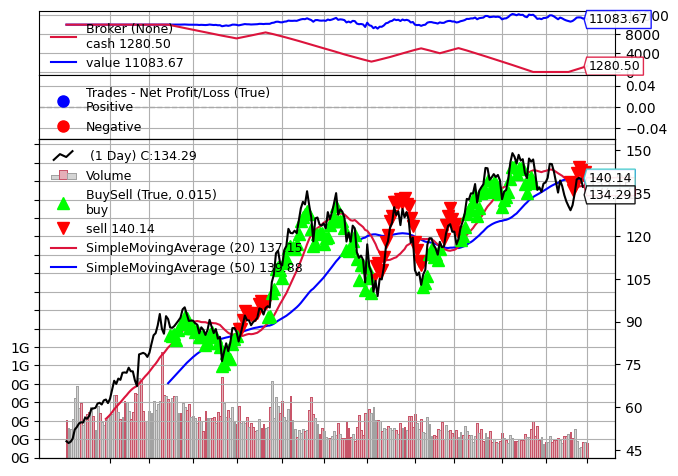

[[<Figure size 640x480 with 4 Axes>]]

In [48]:
%matplotlib inline
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt


if isinstance(stock.columns, pd.MultiIndex):
    stock.columns = [col[0] for col in stock.columns]

stock.index = pd.to_datetime(stock.index)

class MovingAverageStrategy(bt.Strategy):
    def __init__(self):
        self.sma_short = bt.indicators.SimpleMovingAverage(period=20)
        self.sma_long = bt.indicators.SimpleMovingAverage(period=50)

    def next(self):
        if self.sma_short[0] > self.sma_long[0]:  # Buy condition
            self.buy()
        elif self.sma_short[0] < self.sma_long[0]:  # Sell condition
            self.sell()

# Initialize Backtest Engine
cerebro = bt.Cerebro()
datafeed = bt.feeds.PandasData(dataname=stock)
cerebro.adddata(datafeed)
cerebro.addstrategy(MovingAverageStrategy)

# Run Backtest
cerebro.run()
cerebro.plot(iplot=False, figsize=(24, 6), dpi=150)
